Importing important Library

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


Importing data

In [ ]:
df=pd.read_csv("stocksprices.csv")
df.head(3)
df.drop("Unnamed: 0",axis=1,inplace=True)
df.drop("Unnamed: 4",axis=1,inplace=True)
df.drop("Unnamed: 5",axis=1,inplace=True)
df.drop("Unnamed: 6",axis=1,inplace=True)
df.drop("Unnamed: 7",axis=1,inplace=True)
df.drop("Unnamed: 8",axis=1,inplace=True)
df.drop("Unnamed: 9",axis=1,inplace=True)
df.drop("Unnamed: 10",axis=1,inplace=True)
df.drop("Unnamed: 11",axis=1,inplace=True)
df.drop("Unnamed: 12",axis=1,inplace=True)
df.head(3)

,DATE,Close,Company
0,18-10-2024,334.05,ABFRL
1,17-10-2024,330.7,ABFRL
2,16-10-2024,343.45,ABFRL


###While importing the stockprice data many other columns also displayed which are redundent so droping the irrevent columns from the data.

## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     5215 non-null   object
 1   Close    5215 non-null   object
 2   Company  5215 non-null   object
dtypes: object(3)
memory usage: 122.4+ KB


In [ ]:
df.sample(10)

,DATE,Close,Company
4723,07-10-2021,376.5,Tata-Motors
2397,17-02-2023,1583.8,Infosys
1920,21-01-2021,"5,118.30",Bajaj-Finance
2879,10-03-2021,1368.15,Infosys
1553,15-07-2022,"5,915.20",Bajaj-Finance
4592,20-04-2022,440.55,Tata-Motors
1736,21-10-2021,"7,737.30",Bajaj-Finance
2359,19-04-2023,1232.2,Infosys
4979,16-07-2021,311.25,Tata-Motors
4094,23-04-2024,986.75,Tata-Motors


#####The date column have mix of date-month-year and year-month-date formats. we have to make it in consistent format which was detected with help of checking many samples from the data.

In [ ]:
import pandas as pd

def change_date_format(date_str):
    try:
        # Attempt to parse the date string as 'year-month-date'
        datetime_obj = pd.to_datetime(date_str, format='%Y-%m-%d')
        # If successful, reformat to 'date-month-year'
        return datetime_obj.strftime('%d-%m-%Y')
    except ValueError:
        # If parsing as 'year-month-date' fails, assume it's already in 'date-month-year' format
        return date_str

df['DATE'] = df['DATE'].apply(change_date_format)

In this function dectecting the date (year-month-date) format and coverting into date-month-year format. at the end in the date column the function is applied.

In [ ]:
## testing the above code
df["DATE"].sample(10)

,DATE
4504,25-08-2022
3420,05-01-2023
2671,12-01-2022
2338,19-05-2023
2001,25-09-2024
4455,07-11-2022
2072,13-06-2024
3135,29-02-2024
4710,27-10-2021
2606,20-04-2022


In [ ]:
df["DATE"]=pd.to_datetime(df["DATE"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     5215 non-null   datetime64[ns]
 1   Close    5215 non-null   object        
 2   Company  5215 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 122.4+ KB


<ipython-input-9-299ed2bb6f33>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["DATE"]=pd.to_datetime(df["DATE"])


From the data only all the columns are in object data types so we need to convert to numeric for our analysis. to do that converting the float values then into integer.

In [ ]:
## we need to make all the close price into integer so converting into float values
df["Close"] = pd.to_numeric(df["Close"].str.replace(',', ''), errors='coerce').astype("float")



In [ ]:
df["Close"]=df["Close"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     5215 non-null   datetime64[ns]
 1   Close    5215 non-null   int64         
 2   Company  5215 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 122.4+ KB


For further analysis pivot the table where the index is Date column columns are the companies Sunpharma,Infosys,Tata-motor,Bajaj-finance, ABFRL, close price values will be in the row areas.

In [ ]:
new_data=pd.pivot_table(df,index="DATE",columns="Company",values="Close")
#new_data.to_csv("pivot.csv")

In [ ]:
new_data.head(3)

Company,ABFRL,Bajaj-Finance,Infosys,Sunpharma,Tata-Motors
DATE,,,,,
2020-10-20,144.0,3262.0,1137.0,486.0,129.0
2020-10-21,150.0,3232.0,1148.0,489.0,130.0
2020-10-22,153.0,3314.0,1129.0,485.0,133.0


Exploratory data analysis

In [ ]:
new_data.isna().sum()


,0
Company,
ABFRL,0
Bajaj-Finance,1
Infosys,0
Sunpharma,0
Tata-Motors,0


There are 1 null values in the data set in the bajaj finance company. as there are only one value so deleting the value

In [ ]:
new_data.dropna(inplace=True)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 992 entries, 2020-10-20 to 2024-10-18
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ABFRL          992 non-null    float64
 1   Bajaj-Finance  992 non-null    float64
 2   Infosys        992 non-null    float64
 3   Sunpharma      992 non-null    float64
 4   Tata-Motors    992 non-null    float64
dtypes: float64(5)
memory usage: 46.5 KB


In [ ]:
new_data.describe()

Company,ABFRL,Bajaj-Finance,Infosys,Sunpharma,Tata-Motors
count,992.000000,992.000000,992.000000,992.000000,992.000000
mean,246.231855,6591.849798,1525.229839,1016.978831,538.655242
std,51.024960,913.584956,195.836660,344.714405,249.769488
min,144.000000,3232.000000,1060.000000,456.000000,129.000000
25%,212.000000,5997.750000,1390.000000,785.750000,385.750000
50%,236.000000,6836.000000,1502.500000,951.500000,456.000000
75%,286.000000,7272.500000,1673.500000,1146.250000,642.250000
max,358.000000,8168.000000,1968.000000,1948.000000,1161.000000


There are total 992 row values in the data set after dropping one null value. If we look into the mean values of companies then we can see that Bajaj finance have highest avarage value and on other hand ABFRL retail company lowest avarage value.
Out of all the companies ABFRL companuy is having the lowest range in all the five point summary values where as Bajaj-Finance is the highest.

In [ ]:
new_data.reset_index()
## to make date column as one column

Company,DATE,ABFRL,Bajaj-Finance,Infosys,Sunpharma,Tata-Motors
0,2020-10-20,144.0,3262.0,1137.0,486.0,129.0
1,2020-10-21,150.0,3232.0,1148.0,489.0,130.0
2,2020-10-22,153.0,3314.0,1129.0,485.0,133.0
3,2020-10-23,164.0,3316.0,1122.0,484.0,137.0
4,2020-10-26,161.0,3293.0,1112.0,474.0,133.0
...,...,...,...,...,...,...
987,2024-10-14,346.0,7208.0,1958.0,1909.0,928.0
988,2024-10-15,348.0,7016.0,1959.0,1897.0,917.0
989,2024-10-16,343.0,6956.0,1920.0,1897.0,907.0
990,2024-10-17,330.0,6899.0,1968.0,1890.0,891.0


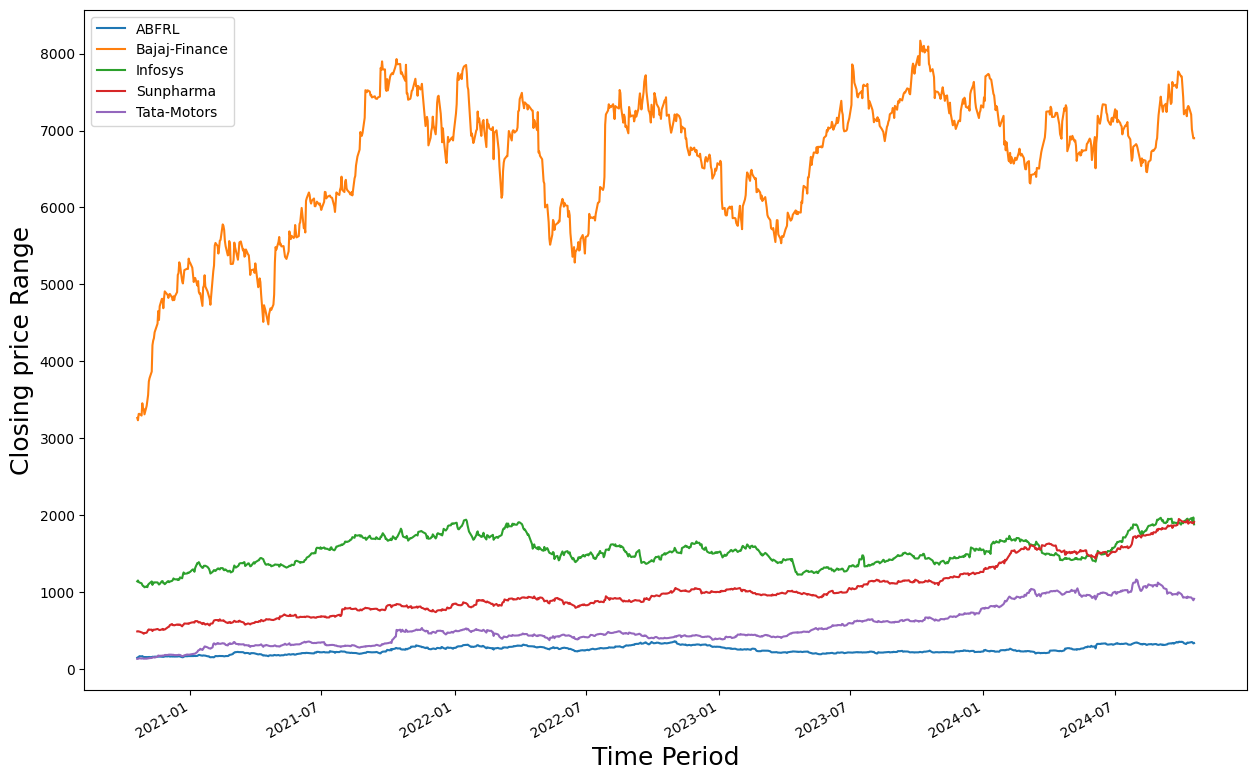

In [ ]:
## plotting the graph
new_data.plot(figsize=(15,10))
plt.xlabel("Time Period",fontsize=18)
plt.ylabel("Closing price Range",fontsize=18)
plt.legend(new_data.columns.values)
plt.show()

1. This line graph shows daily closing prices of five different stocks over 2020-2024.

2. The x-axis represent time frame 2020-2024 and Y-axis represent closing prices.

3. Bajaj Finance has the highest closing price among all the companies, followed by Infosys and Sunpharma. ABFRL Retail has the lowest closing price.

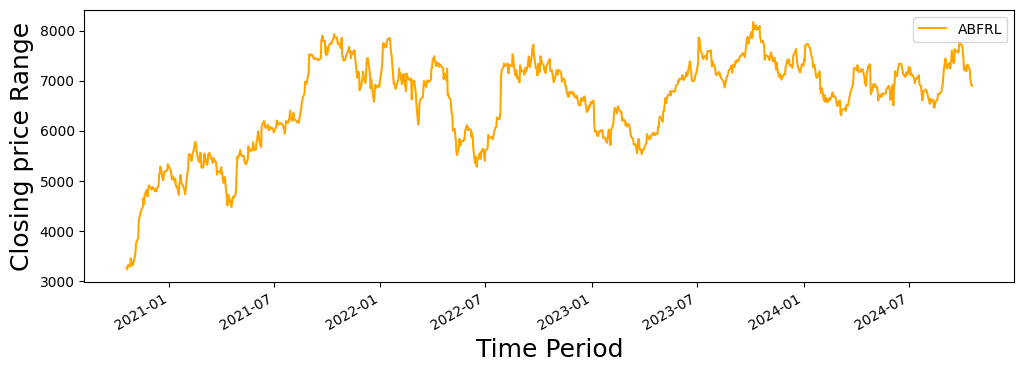

In [ ]:
new_data["Bajaj-Finance"].plot(figsize=(12,4), color="Orange")
plt.xlabel("Time Period",fontsize=18)
plt.ylabel("Closing price Range",fontsize=18)
plt.legend(new_data.columns.values)
plt.show()

1. This line graph shows daily closing prices of Bajaj-Finances stocks over 2020-2024.

2. The x-axis represent time frame 2020-2024 and Y-axis represent closing prices.

3. We can see that the closing price of Bajaj Finance has generally increased over the time period.

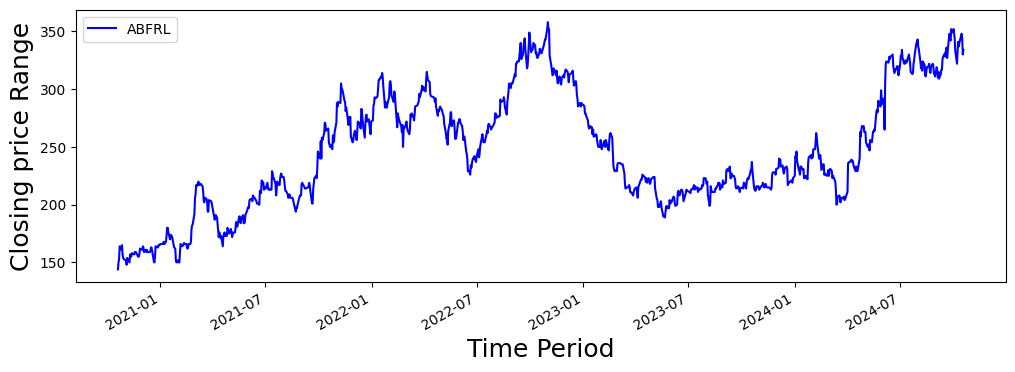

In [ ]:
new_data["ABFRL"].plot(figsize=(12,4), color="Blue")
plt.xlabel("Time Period",fontsize=18)
plt.ylabel("Closing price Range",fontsize=18)
plt.legend(new_data.columns.values)
plt.show()

1. This line graph shows daily closing prices of Bajaj-Finances stocks over 2020-2024.

2. The x-axis represent time frame 2020-2024 and Y-axis represent closing prices.

3. We can see that the line graph is fluctuating in whole time frame.

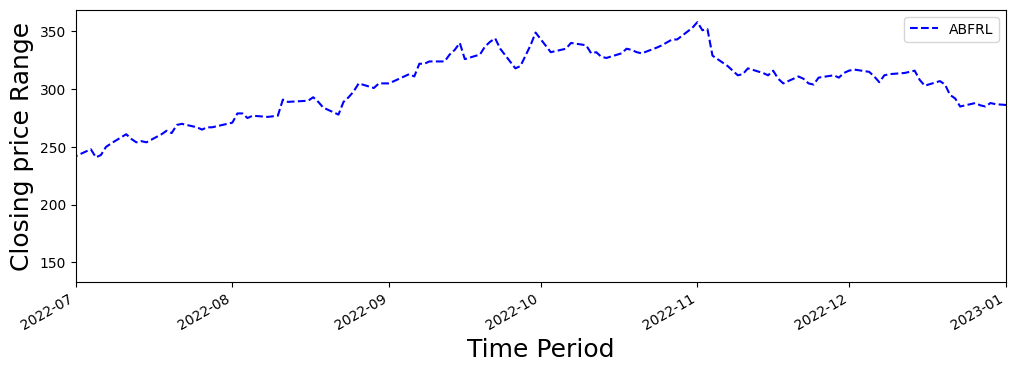

In [ ]:
## some closer look 2022-07 to 2023-01 Rising line graph
new_data["ABFRL"].plot(xlim=["2022-07-01",'2023-01-01'],figsize=(12,4), ls="--",color="Blue")
plt.xlabel("Time Period",fontsize=18)
plt.ylabel("Closing price Range",fontsize=18)
plt.legend(new_data.columns.values)
plt.show()


2022-07-01 - 2023-01-01

in this period the line graph is stable or less volatile.

In [ ]:
## Time Resampling

new_data.head(3)

Company,ABFRL,Bajaj-Finance,Infosys,Sunpharma,Tata-Motors
DATE,,,,,
2020-10-20,144.0,3262.0,1137.0,486.0,129.0
2020-10-21,150.0,3232.0,1148.0,489.0,130.0
2020-10-22,153.0,3314.0,1129.0,485.0,133.0


In [ ]:
## year end frequency
new_data.resample(rule="A").max()
## Getting the maximum close price of 5 years in 5 different companies

<ipython-input-24-aa7900641277>:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  new_data.resample(rule="A").max()


Company,ABFRL,Bajaj-Finance,Infosys,Sunpharma,Tata-Motors
DATE,,,,,
2020-12-31,165.0,5334.0,1255.0,592.0,186.0
2021-12-31,305.0,7929.0,1892.0,845.0,530.0
2022-12-31,358.0,7852.0,1939.0,1051.0,525.0
2023-12-31,286.0,8168.0,1617.0,1262.0,779.0
2024-12-31,352.0,7768.0,1968.0,1948.0,1161.0


The above table shows yearly wise highest closing price of all companies. through this table we can see yearly wise which company is improving / changing. Tata motors, sunpharma is increasing the maximium price year by year where as infosys is fluctuating.

In [ ]:
new_data.resample(rule="YE").mean()

Company,ABFRL,Bajaj-Finance,Infosys,Sunpharma,Tata-Motors
DATE,,,,,
2020-12-31,157.660000,4439.000000,1141.320000,528.580000,161.500000
2021-12-31,214.000000,6230.907258,1535.028226,704.137097,347.282258
2022-12-31,291.145161,6771.500000,1592.181452,907.600806,438.008065
2023-12-31,223.361789,6884.296748,1416.028455,1069.016260,558.390244
2024-12-31,280.780000,6995.155000,1660.355000,1598.625000,970.775000


The above table shows the mean values on yearly basis.
we can see that the ABFRL, Bajaj-Finance company is quiet constant through out this four year where as sunpharma, tata-motors company is increasing year by year.

Lets now see the diagram of highest closing price of Bajaj-Finance company year wise maximum closing price.

<ipython-input-26-beaf827a125a>:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  new_data.resample(rule="A").mean()["Bajaj-Finance"].plot()


Text(0.5, 1.0, 'Bajaj-Finance')

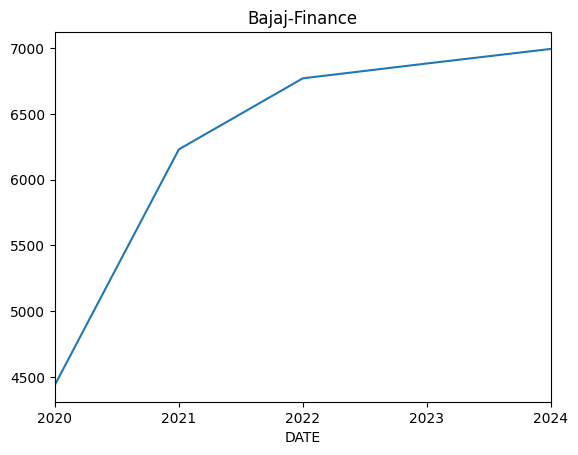

In [ ]:
# year end frequency
new_data.resample(rule="A").mean()["Bajaj-Finance"].plot()
plt.title("Bajaj-Finance")

From this diagram we can see that maximum closing price of this stock got raised from 2020. so the performance gets better from 2021 onwards.

<ipython-input-27-ef02a840713c>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  new_data.resample(rule="A").mean()["ABFRL"].plot(kind="bar")


Text(0.5, 1.0, 'ABFRL')

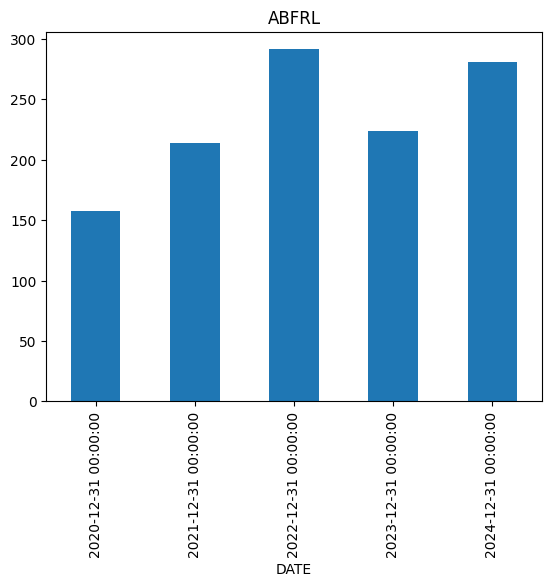

In [ ]:
new_data.resample(rule="A").mean()["ABFRL"].plot(kind="bar")
plt.title("ABFRL")

From year 2021 the company performance starts doing better but just after two year dip in the mean price can be seen.

Text(0.5, 1.0, 'Sunpharma')

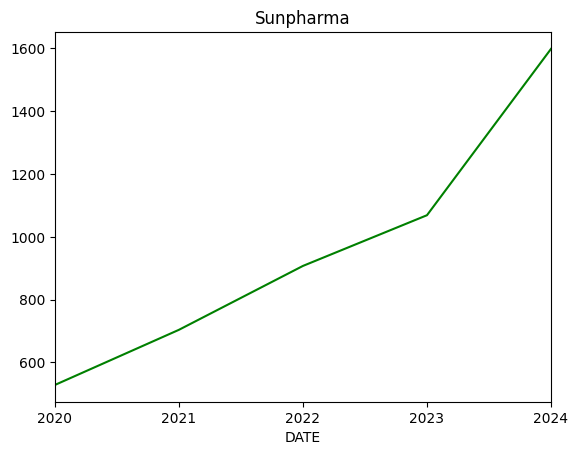

In [ ]:
new_data.resample(rule='YE').mean()["Sunpharma"].plot(color="green")
plt.title("Sunpharma")

We can see that maximum closing price of sunpharma(medical industry) year wise is increasing year by year. it is because medical facility is needed even if whole market get shutdown.due to that closing price does not falls like other industry.

Text(0.5, 1.0, 'Tata-Motors')

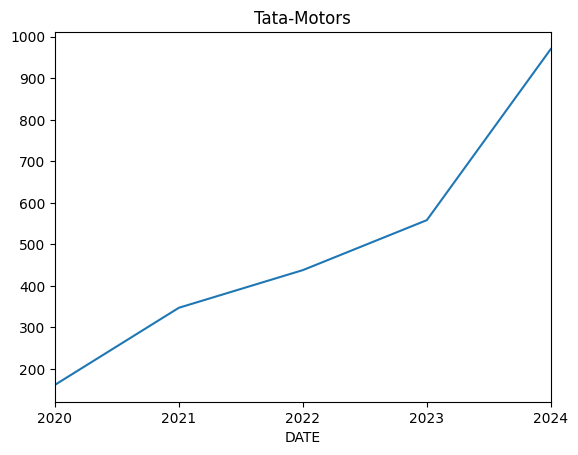

In [ ]:
new_data.resample(rule="YE").mean()["Tata-Motors"].plot()
plt.title("Tata-Motors")

The closing price is constantly increasing suggesting that the company is performing well beacause year by year closing price mean is increasing which indicate to trust that tata-motors to investing on.

Text(0.5, 1.0, 'Infosys')

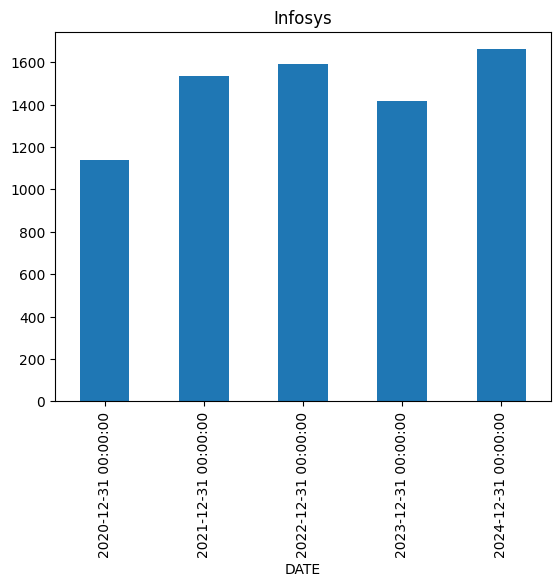

In [ ]:
new_data.resample(rule="YE").mean()["Infosys"].plot(kind="bar")
plt.title("Infosys")

Infosys company is quite stable as per diagram. due to the constant mean value / with minimum fluctucting mean values.

In [ ]:
abfrl_comp=np.std(new_data["ABFRL"]) #Calculate the standard deviation of ABFRL column in the dataframe
abfrl_comp #prints the ABFRL

In [ ]:
new_data["ABFRL"].plot(figsize=(10,6))
plt.fill_between(new_data.index, new_data["ABFRL"] - abfrl_comp, new_data["ABFRL"] + abfrl_comp, alpha=0.2, label="Standard Deviation")
plt.xlabel("Time Period")
plt.ylabel("ABFRL Values")
plt.title("Line Chart of ABFRL")
plt.show()

The diagram shows a diagram depicting the historical values ​​of ABFRL (Aditya Birla Fashion and Retail Limited), India’s leading fashion and retail company. The blue line represents long-term ABFRL stock prices, while the gray shaded area around it shows the long-range range of those prices. This graph allows the viewer to understand the volatility and volatility of ABFRL’s stock price, providing insight into the company’s performance over a period of time.

In [ ]:
bajaj_comp=np.std(new_data["Bajaj-Finance"]) #Calculate the standard deviation of Bajaj column in the dataframe
bajaj_comp #prints the bajaj_comp column

In [ ]:
new_data["Bajaj-Finance"].plot(figsize=(10,6),color="violet")
plt.fill_between(new_data.index, new_data["Bajaj-Finance"] - bajaj_comp, new_data["Bajaj-Finance"] + bajaj_comp, alpha=0.2, label="Standard Deviation")
plt.xlabel("Time Period")
plt.ylabel("Bajaj-Finance Values")
plt.title("Line Chart of Bajaj-Finance")
plt.show()

The figure shows a graphical representation of the historical stock price of Bajaj Finance, India’s leading non-bank finance company. The blue line represents the Bajaj Finance stock price over time, while the shaded gray area around it shows the standard deviation of those prices This graphic allows the viewer to understand the volatility and amount of volatility in the share price of Bajaj Finance

In [ ]:
info_comp=np.std(new_data["Infosys"])#Calculate the standard deviation of ABFRL column in the dataframe
info_comp

In [ ]:
new_data["Infosys"].plot(figsize=(10,6),color="green")
plt.fill_between(new_data.index, new_data["Infosys"] - info_comp, new_data["Infosys"] + info_comp, alpha=0.2, label="Standard Deviation")
plt.xlabel("Time Period")
plt.ylabel("Infosys Values")
plt.title("Line Chart of Infosys")
plt.show()

The figure shows a sketch of the historical list prices of Infosys, India’s leading IT company. The blue line represents the price of Infosys over the years, as even the gray shading around it shows the same old difference in that price This image enables the viewer to hear changes in Infosys inventory costs as well as under volatility diplomas, giving him insight into the company's performance over a period of time

In [ ]:
sunph_comp=np.std(new_data["Sunpharma"]) #Calculate the standard deviation of Sunpharma column in the dataframe
sunph_comp

In [ ]:
new_data["Sunpharma"].plot(figsize=(10,6),color="blue")
plt.fill_between(new_data.index, new_data["Sunpharma"] - sunph_comp, new_data["Sunpharma"] + sunph_comp, alpha=0.2, label="Standard Deviation")
plt.xlabel("Time Period")
plt.ylabel("Sunpharma Values")
plt.title("Line Chart of Sunpharma")
plt.show()

The figure shows a graphical representation of the historical stock price of Sun Pharma, India’s leading pharmaceutical company. The blue line represents the Sunpharma stock price over time, while the gray shaded area around it shows the range of those values. This graph allows the viewer to understand the changes in Sunpharma's stock price and the extent of its volatility, and provides an overview of the company's performance over a period of time

In [ ]:
tata_comp=np.std(new_data["Tata-Motors"]) #Calculate the standard deviation of tata column in the dataframe
tata_comp

In [ ]:
new_data["Tata-Motors"].plot(figsize=(10,6),color="red")
plt.fill_between(new_data.index, new_data["Tata-Motors"] - tata_comp, new_data["Tata-Motors"] + tata_comp, alpha=0.2, label="Standard Deviation")
plt.xlabel("Time Period")
plt.ylabel("Tata-Motors Values")
plt.title("Line Chart of Tata-Motors")
plt.show()

The graphic shows a graphical representation of the historical value of Tesla Motors, a major manufacturer of electric cars, over time. The blue line represents Tesla's stock price, while the gray shaded area around it shows the range of those prices. This visualization allows the viewer to understand the changes and volatility of Tesla’s stock price, providing insight into the company’s performance over a specific period of time

In [ ]:
plt.figure(figsize=(10,10)) # generate a box plot using seaborn for thensecified stocks
sns.heatmap(new_data.corr(),annot=True),plt.show()

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
## assigning weights to our stocks
weights=np.array([0.2,0.2,0.2,0.2,0.2])

Assigning equal weights initially in other words investing equal amount of money in five stocks. here there are five stocks so investing 20% of money in each stock (Total 100% investing money).

In [ ]:
df.set_index("DATE",inplace=True)

Making date column as is unique indentifier of each rows.this function has this purpose.

In [ ]:
## Daily simple return
returns= df.pct_change()
returns

Returns means it is daily percentage change in stock price.in other words it is percentage change in the value of an investment over a single day.

In [ ]:
cov_variance_annual=returns.cov()*252
cov_variance_annual

It is covariance of the data over the years. covariance can be calculated with two numerical column to know the association over a specific period

In [ ]:
## calculate portfolio variance
port_variance=np.dot(weights.T,np.dot(cov_variance_annual,weights))
port_variance

Here we are calculating the portfolio variance by multiplying the weights and annual covariance.

In [ ]:
port_volatility=np.sqrt(port_variance)
port_volatility

Here we are finding the standerd deviation of portfoilio variance.

In [ ]:
## calculate annual portfolio return
portfoliosimpleannualreturn=np.sum(returns.mean()*weights)*252
portfoliosimpleannualreturn

In [ ]:
## calculate expected annual return, volatility
per_vols=str(round(port_volatility,2) *100) + '%'
per_return=str(round(portfoliosimpleannualreturn,2) *100) + '%'


print("expected annual return: " +per_return)
print("Annual Volatility: " +per_vols)


By using above formula we have found that expected annual return and annual volatility are 32% and 20%.

In [ ]:
pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

Importing the important library for portfolio optimization that are efficient frontier , risk models , expected returns.

In [ ]:
## portfolio optimization
## Calculate the expected return  and annualized sample covarience matrix of assets
mu= expected_returns.mean_historical_return(df)
S= risk_models.sample_cov(df)


## optimize for maximum sharpe ratio
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

##Final conclusion of the portfolio optimization with efficient frontier
With help of this method it suggest that the invest 66% of the money in Sunpharma stock and 33% of the money in Tata-Motors which will give annual return 49% and volatility 21.8%

If we compare the before portfolio optimization annual return is 32% and after the portfolio optimization annual return is 49%. It means that return got increased with help of this method.

In [ ]:
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Calculate the efficient frontier
#Initial calculation of efficient frontier for the max sharpe portfolio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
# Get portfolio performance for the max sharpe portfolio
ret, vol, sharpe = ef.portfolio_performance(verbose=True)


# Generate the efficient frontier points
n_points = 100  # Number of points to plot
weights_frontier = []
mu_frontier = []
sigma_frontier = []

#Loop through the desired number of efficient frontier points to plot
for i in range(n_points):
    #Create a new EfficientFrontier object for each point on the efficient frontier
    ef_temp = EfficientFrontier(mu, S)  # Create a new instance
    weights = ef_temp.efficient_return(target_return=(ret - 0.1) + i * (0.2 / n_points))  #Use temp instance
    weights_frontier.append(weights)
    #Calculate portfolio performance for this point on the efficient frontier
    mu_frontier.append(ef_temp.portfolio_performance()[0])  # Use temp instance
    sigma_frontier.append(ef_temp.portfolio_performance()[1])  # Use temp instance


# Create the plot
fig, ax = plt.subplots()
# Scatter plot of efficient frontier
ax.scatter(sigma_frontier, mu_frontier, marker='o', label='Efficient Frontier')

# Highlight the maximum Sharpe ratio portfolio
ax.scatter(vol, ret, marker='*', color='r', s=200, label='Max Sharpe Ratio')

# Add labels
ax.set_xlabel('Volatility')
ax.set_ylabel('Expected Return')
ax.set_title('Efficient Frontier')

# Display the plot
plt.show()

Diagram of efficient frontier. the red star is indicating combination of the optimal combination to give highest return with no or minimum increase in risk.

In [ ]:
##get the discrete allocation of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices= get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value=12000)

allocation,leftover=da.lp_portfolio()
print("Discrete allocation:",allocation)
print("Funds remaining: Rs {:.2f}".format(leftover))


It suggesting to buy ABFRL 1 stock , Sunpharma 4 stocks , Tata motors 4 stocks. after buying these stocks the investor will remain with 390 Rupees as well.

In [ ]:
print(latest_prices)
## 334*1  - ABFRL
## 1909*4 - Sunpharma
## 910*4 - Tata-Motors

In [ ]:
# prompt: how to make the peichart out of the data 334*1  - ABFRL
# ## 1909*4 - Sunpharma
# ## 910*4 - Tata-Motors

import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['ABFRL', 'Sunpharma', 'Tata-Motors', 'Remaining-funds']
sizes = [334, 1909 * 4, 910 * 4, 390]  # Adjusted values based on your data
colors = ['green', 'lightskyblue', 'gold', 'red']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.01f%%', shadow=True, startangle=130,radius=2)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Stock Portfolio Distribution with help of Efficient Frontier')
plt.show()

Pie chart which shows the distribution of the investing money in each stocks which clearly show that it suggest to invest 63.6% in sunpharma, 30.3% in Tata-Motors, 2.8% in ABFRL.

##Portfolio optimization using Robust Optimization

In [ ]:
print(returns["ABFRL"].min())
print(returns["Bajaj-Finance"].min())
print(returns["Infosys"].min())
print(returns["Sunpharma"].min())
print(returns["Tata-Motors"].min())

Calculating the minimum expected return of five companies to use in the futher analysis.

In [ ]:
print(returns["ABFRL"].max())
print(returns["Bajaj-Finance"].max())
print(returns["Infosys"].max())
print(returns["Sunpharma"].max())
print(returns["Tata-Motors"].max())

Calculating the maximum expected return of five companies to use in the futher analysis.

In [ ]:
covariance=returns.cov()
covariance=np.array(covariance)
covariance

Finding coveriance matrix with help of expected returns.

In [ ]:
import cvxpy as cp
import numpy as np

# Define the number of assets
n_assets = 5

# Define uncertain expected returns and covariance matrix
mu_min = np.array([-0.092,-0.077,-0.094,-0.042,-0.104])
mu_max = np.array([0.100,0.106,0.078,0.100,0.204])
Sigma = covariance

# Define the optimization problem
w = cp.Variable(n_assets)
ret = cp.sum(cp.multiply(mu_min, w))
risk = cp.quad_form(w, Sigma)

# Constraints: Weights must sum to 1, and all weights must be non-negative
constraints = [cp.sum(w) == 1, w >= 0]

lambda_reg = 0.01  # Adjust the regularization parameter as needed
reg_term = cp.sum(cp.square(w))

# Modify the objective function
prob = cp.Problem(cp.Maximize(ret - lambda_reg * reg_term), constraints)
prob.solve()


print("Optimal portfolio weights:", w.value)

**As the optimal weights suggesting to invest almost in sunpharma company with negligible amount of money in other four companies.**

In [ ]:
# Data for the pie chart - focusing only on Sunpharma
labels = ['Sunpharma']
sizes = [1909 * 4]  # Using the Sunpharma allocation from the original code
colors = ['green']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.01f%%', shadow=True, startangle=130)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sunpharma Stock Allocation')
plt.show()

Portfolio optimzation through the robust optimization suggest to investing 100% of investing in Sunpharma company.